In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
# import dataset
df = pd.read_csv('data/kc_house_data.csv', index_col = "id")
# previewing the DataFrame
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

## Clean Data
Missing & Null Values

In [4]:
# Find missing values
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# encode the values of the "view" column into a numeric form readable by inferential and predictive models
df['view'].replace({'NONE': 0.0 , 'FAIR': 1.0, 'AVERAGE': 2.0, 'GOOD': 3.0, 'EXCELLENT': 4.0}, inplace=True)

df['condition'].replace({'Poor': 0.0 , 'Fair': 1.0, 'Average': 2.0, 'Good': 3.0, 'Very Good': 4.0}, inplace=True)

df['waterfront'].replace({'NO': 0.0 , 'YES': 1.0}, inplace=True)


In [6]:
# observe "waterfront" values
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [7]:
# Fill missing values for "waterfront" with 0
df.waterfront.fillna(0.0, inplace=True)

In [8]:
# observe "view" values
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
# Fill missing values for "view" with 0
df.view.fillna(0.0, inplace=True)

In [10]:
# observe "yr_renovated" values
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
# Fill missing values for "yr_renovated" with 0
df.yr_renovated.fillna(0.0, inplace=True)

In [12]:
# Check missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data Types

In [13]:
#waterfront column from float to int
df.waterfront = df.waterfront.astype('int64')

#replace ? values with 0
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0) 
# cast sqft_basement from object to float
df.sqft_basement = df.sqft_basement.astype('float64') 

#float to int
df.view = df.view.astype('int64') 

#float to int
df.floors = df.floors.astype('int64') 

#float to int
df.yr_renovated = df.yr_renovated.astype('int64')

#obj to int
df.condition = df.condition.astype('int64')

In [14]:
df['grade'] = df['grade'].str.replace('7 Average', '7')
df['grade'] = df['grade'].str.replace('8 Good', '8')
df['grade'] = df['grade'].str.replace('9 Better', '9')
df['grade'] = df['grade'].str.replace('6 Low Average', '6')
df['grade'] = df['grade'].str.replace('10 Very Good', '10')
df['grade'] = df['grade'].str.replace('11 Excellent', '11')
df['grade'] = df['grade'].str.replace('5 Fair', '5')
df['grade'] = df['grade'].str.replace('12 Luxury', '12')
df['grade'] = df['grade'].str.replace('4 Low', '4')
df['grade'] = df['grade'].str.replace('13 Mansion', '13')
df['grade'] = df['grade'].str.replace('3 Poor', '3')
df['grade'] = pd.to_numeric(df['grade'])

In [15]:
#convert date
df['date'] = pd.to_datetime(df['date'])

#separate column extracts month & year from original date column
df['month_sold'] = df['date'].dt.month  
df['year_sold'] = df['date'].dt.year

In [16]:
#renovated column to show if homes were renovated/built in last 10 years
df['renovated'] = df['year_sold'] - df['yr_renovated']

#replace values less than 10 with 1 & values >10 with 0
renovated = df.renovated.values

#convert year_built to age
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 10, 1, values)
df.renovated = df.renovated.astype('int64')

#drop yr_renovated column
df.drop(columns=['yr_renovated'], axis=1, inplace=True)

#drop age column
df.drop(columns=['age'], axis=1, inplace=True)

#drop date column
df.drop(columns=['date'], axis=1, inplace=True)

In [17]:
# check our dataframe #Take out ID
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  int64  
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64

## Multicollinearity

<AxesSubplot:>

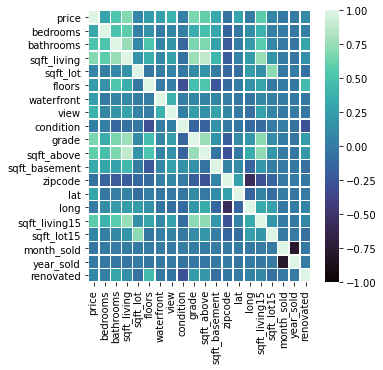

In [18]:
#Correlation matrix
corr = df.corr() 

#Create mask 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Matplotlib figure
plt.subplots(figsize=(5,5))

#Custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

#Heatmap with mask & ratio
sns.heatmap(corr, cmap="mako", vmax=1, vmin=-1, center=0, linewidths=.5)

In [19]:
# Show all pairwise correlations above .75
abs(corr) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


In [20]:
# High correlations between sqft_living vs. bathrooms
# High correlations between sqft_living vs. grade
# High correlations between sqft_living vs. sqft_above
# High correlations between sqft_living vs. sqft_living15
# High correlations between grade vs.sqft_above
# High correlations between sqft_living15 vs. grade
# High correlations between sqft_living15 vs. sqft_above
# High correlations between year_sold vs. month_sold

df.drop(['sqft_above'], axis=1, inplace=True)
df.drop(['sqft_basement'], axis=1, inplace=True)
df.drop(['grade'], axis=1, inplace=True)
df.drop(['sqft_living15'], axis=1, inplace=True)
df.drop(['sqft_lot15'], axis=1, inplace=True)
df.drop(['year_sold'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  int64  
 6   waterfront   21597 non-null  int64  
 7   view         21597 non-null  int64  
 8   condition    21597 non-null  int64  
 9   zipcode      21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
 12  month_sold   21597 non-null  int64  
 13  renovated    21597 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.5 MB


In [22]:
# Look at statistics info
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,month_sold,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.445988,0.006760,0.233181,2.409825,98077.951845,47.560093,-122.213982,6.573969,0.159328
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.551658,0.081944,0.764673,0.650546,53.513072,0.138552,0.140724,3.115061,0.365990
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,1.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,98033.000000,47.471100,-122.328000,4.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,2.000000,98065.000000,47.571800,-122.231000,6.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,3.000000,98118.000000,47.678000,-122.125000,9.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,4.000000,98199.000000,47.777600,-121.315000,12.000000,1.000000


In [23]:
# Value counts for bedroom
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [24]:
# Keep values from 1 - 7 bedrooms
df = df[(df.bedrooms <= 7)] 

In [25]:
# Look at statistics info again
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,month_sold,renovated
count,2.157300e+04,21573.000000,21573.000000,21573.000000,2.157300e+04,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000
mean,5.398153e+05,3.366198,2.114113,2078.566773,1.510754e+04,1.445696,0.006768,0.233208,2.409771,98077.943448,47.560013,-122.213912,6.572892,0.159412
std,3.665808e+05,0.887545,0.766504,916.313151,4.143470e+04,0.551603,0.081989,0.764735,0.650479,53.523320,0.138592,0.140767,3.114633,0.366069
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,1.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,98033.000000,47.470700,-122.328000,4.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.000000,0.000000,0.000000,2.000000,98065.000000,47.571700,-122.230000,6.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,3.000000,98118.000000,47.678000,-122.125000,9.000000,0.000000
max,7.700000e+06,7.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,4.000000,98199.000000,47.777600,-121.315000,12.000000,1.000000


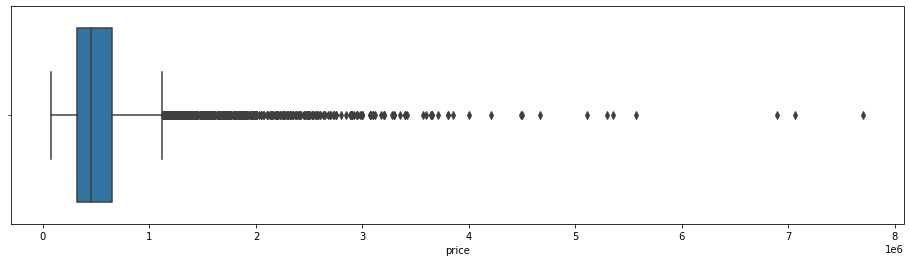

In [26]:
# Boxplot for price
plt.figure(figsize=(16,4))
plt.subplot(111)
sns.boxplot(x='price', data=df);

Text(0.5, 1.0, 'Price Distribution')

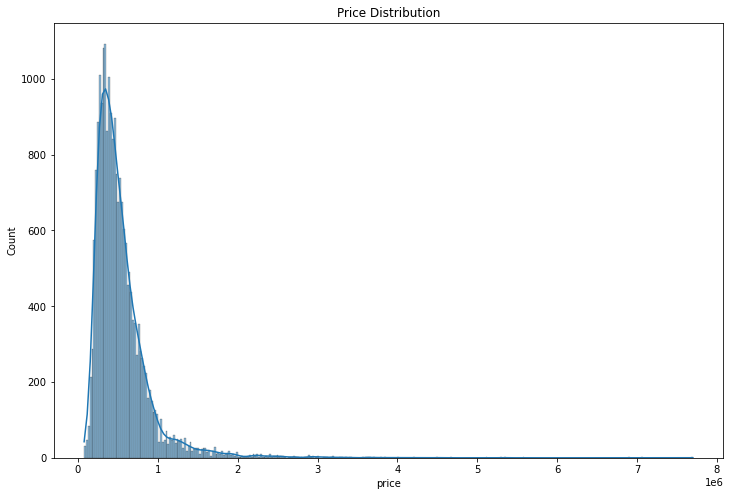

In [27]:
plt.figure(figsize=(12, 8))
sns.histplot(df.price,kde=True)
plt.title('Price Distribution')

In [28]:
df = df[df['price'] <= 1000000]

<AxesSubplot:xlabel='price'>

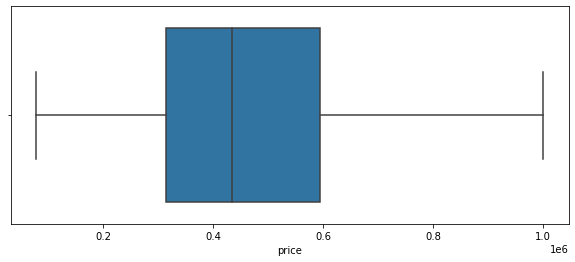

In [29]:
# check boxplot for price
plt.figure(figsize=(10,4))
plt.subplot(111)
sns.boxplot(x='price', data=df)

Text(0.5, 1.0, 'Price Distribution')

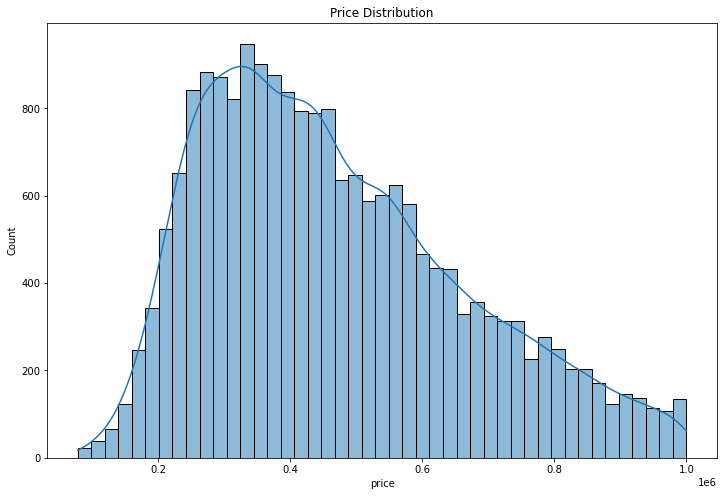

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(df.price,kde=True)
plt.title('Price Distribution')

In [31]:
# Look at statistics info again to see any unusual numbers
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,month_sold,renovated
count,20122.000000,20122.000000,20122.000000,20122.000000,2.012200e+04,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000
mean,467846.888928,3.316867,2.038155,1954.530713,1.450800e+04,1.423616,0.002485,0.161962,2.405377,98078.576086,47.555890,-122.213251,6.577925,0.152619
std,196472.910663,0.869716,0.700580,754.634015,3.997407e+04,0.548212,0.049787,0.619385,0.645828,53.322773,0.141696,0.142462,3.117948,0.359629
min,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,1.000000,0.000000
25%,314275.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,2.000000,98033.000000,47.457500,-122.330000,4.000000,0.000000
50%,434500.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,2.000000,98065.000000,47.565800,-122.233000,6.000000,0.000000
75%,593757.750000,4.000000,2.500000,2410.000000,1.026000e+04,2.000000,0.000000,0.000000,3.000000,98118.000000,47.680100,-122.122000,9.000000,0.000000
max,1000000.000000,7.000000,6.750000,7480.000000,1.651359e+06,3.000000,1.000000,4.000000,4.000000,98199.000000,47.777600,-121.315000,12.000000,1.000000


### Observe correlations between Price and Features

Text(0.5, 1.0, 'Price vs. Bedrooms')

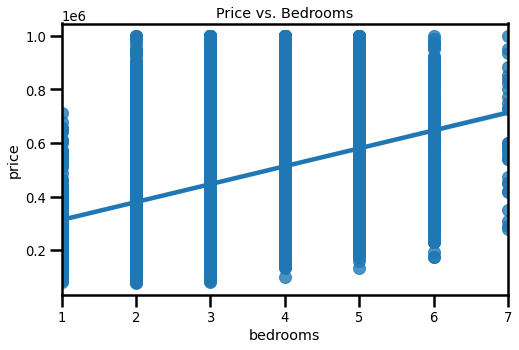

In [32]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (8,5))
sns.regplot(x = "bedrooms", y = "price", data = df)
plt.title('Price vs. Bedrooms')

Text(0.5, 1.0, 'Price vs. Bathrooms')

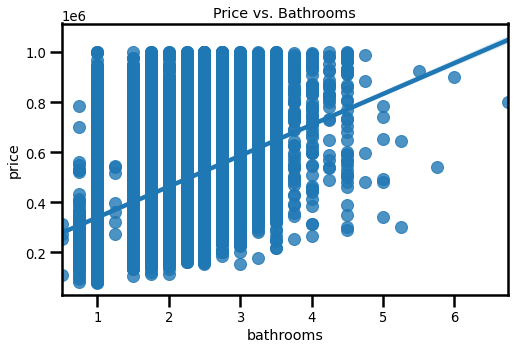

In [33]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (8,5))
sns.regplot(x = "bathrooms", y = "price", data = df)
plt.title('Price vs. Bathrooms')

Text(0.5, 1.0, 'Price vs. Sqft_Living')

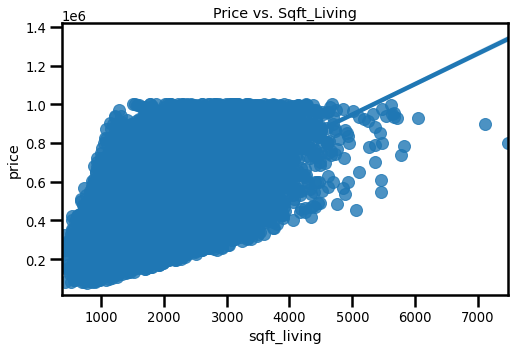

In [34]:
plt.figure(figsize = (8,5))
sns.regplot(x = "sqft_living", y = "price", data = df)
plt.title('Price vs. Sqft_Living')

Text(0.5, 1.0, 'Price vs. Sqft_Lot')

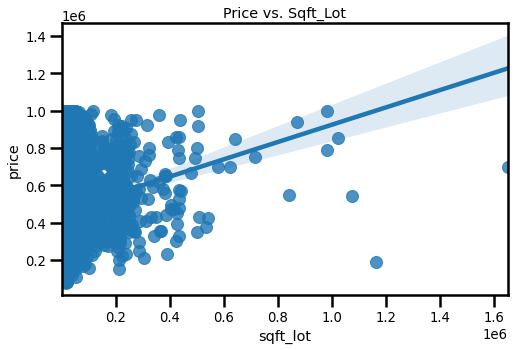

In [35]:
plt.figure(figsize = (8,5))
sns.regplot(x = "sqft_lot", y = "price", data = df)
plt.title('Price vs. Sqft_Lot')

Text(0.5, 1.0, 'Price vs. Floors')

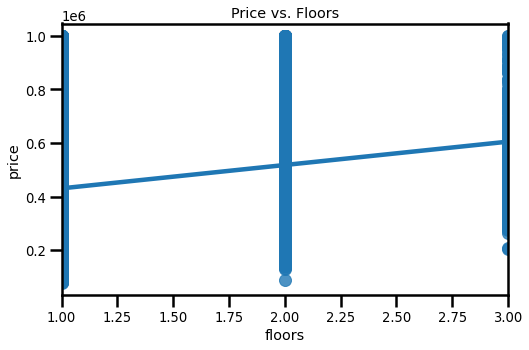

In [36]:
plt.figure(figsize = (8,5))
sns.regplot(x = "floors", y = "price", data = df, ci=False)
plt.title('Price vs. Floors')

Text(0.5, 1.0, 'Price vs. Waterfront')

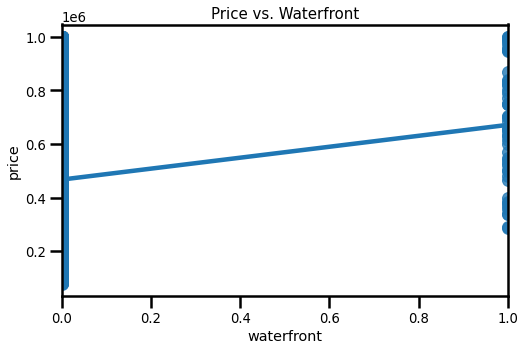

In [37]:
plt.figure(figsize = (8,5))
sns.regplot(x = "waterfront", y = "price", data = df, ci=False)
plt.title('Price vs. Waterfront', fontsize = 15)

Text(0.5, 1.0, 'Price vs. View')

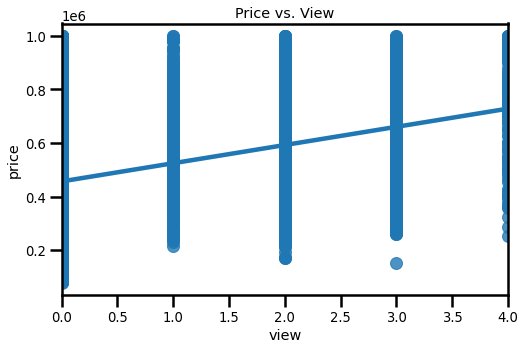

In [38]:
plt.figure(figsize = (8,5))
sns.regplot(x = "view", y = "price", data = df, ci=False)
plt.title('Price vs. View')

Text(0.5, 1.0, 'Price vs. Condition')

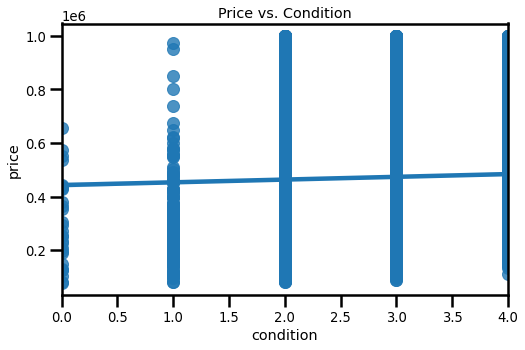

In [39]:
plt.figure(figsize = (8,5))
sns.regplot(x = "condition", y = "price", data = df)
plt.title('Price vs. Condition')

Text(0.5, 1.0, 'Price vs. Month Sold')

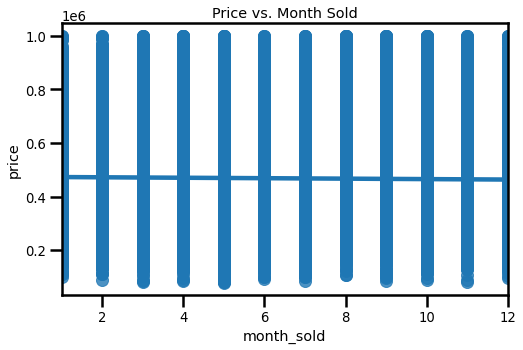

In [40]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (8,5))
sns.regplot(x = "month_sold", y = "price", data = df, ci=False)
plt.title('Price vs. Month Sold')

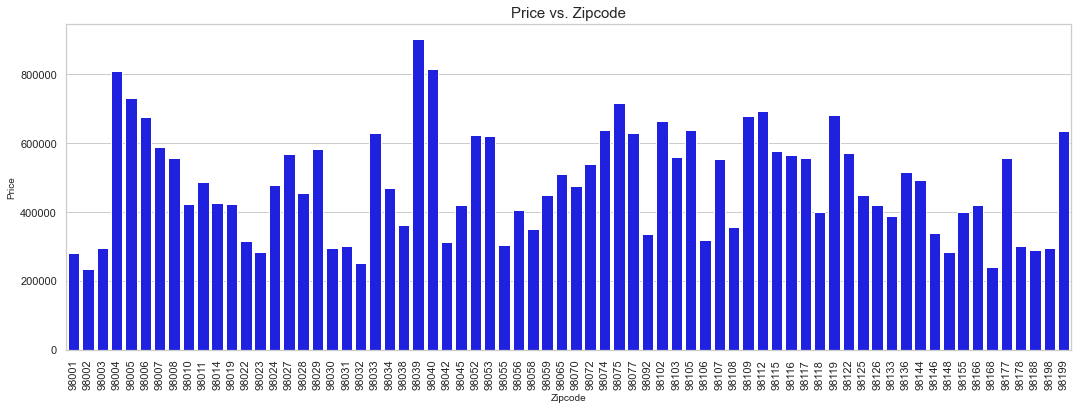

In [41]:
sns.set(style='whitegrid')
plt.subplots(figsize=(18, 6))
sns.barplot(x='zipcode', y='price', ci=False, data=df, color='blue')
plt.title('Price vs. Zipcode', fontsize = 15)
plt.xlabel('Zipcode', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90);

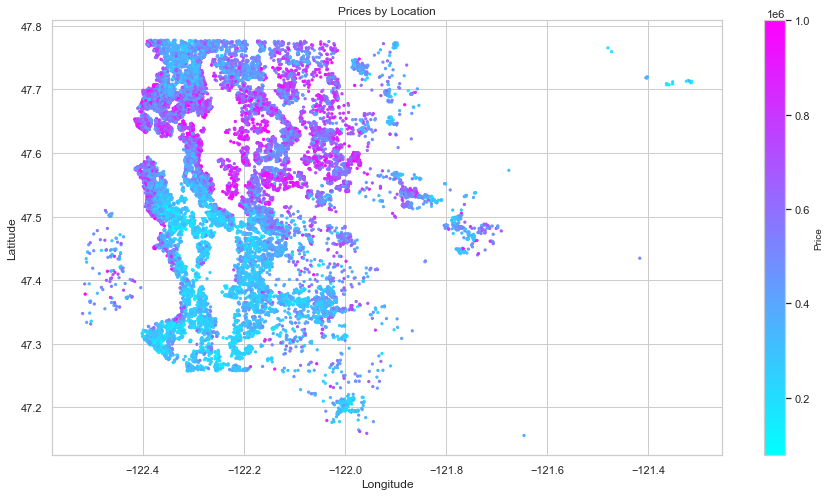

In [42]:
plt.figure(figsize = (15,8))
plt.scatter(df.long, df.lat ,c=df.price, cmap = 'cool', s=5)
plt.colorbar().set_label('Price', fontsize = 10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Prices by Location')
plt.show()

### Categorical vs. Numerical Data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20122 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20122 non-null  float64
 1   bedrooms     20122 non-null  int64  
 2   bathrooms    20122 non-null  float64
 3   sqft_living  20122 non-null  int64  
 4   sqft_lot     20122 non-null  int64  
 5   floors       20122 non-null  int64  
 6   waterfront   20122 non-null  int64  
 7   view         20122 non-null  int64  
 8   condition    20122 non-null  int64  
 9   zipcode      20122 non-null  int64  
 10  lat          20122 non-null  float64
 11  long         20122 non-null  float64
 12  month_sold   20122 non-null  int64  
 13  renovated    20122 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.9 MB


In [44]:
#df.columns

In [45]:
#df.info()

### Model 

In [46]:
# Function for linear regression
def linear_model(dataframe):
    '''Build linear regression model, return model and print model summary from statsmodels.'''
    #Create feature and target columns
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)
    
    # Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    model
    
    # View model accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Training Score:', round(train_score, 3))
    print('Test Score:', round(test_score, 3))
    print('Coefficients:', model.coef_)
    
    # View model summary in statsmodels
    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

### Model 1

In [47]:
model = linear_model(df)
model

Training Score: 0.599
Test Score: 0.614
Coefficients: [-1.57899452e+04  8.89040906e+03  1.52031182e+02  2.22416224e-01
  2.10026522e+04  1.24108198e+05  4.03994814e+04  3.28250385e+04
 -2.43560455e+02  6.37353892e+05 -9.68190648e+04 -2.14705543e+03
  1.68035483e+04]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1847.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:36:46   Log-Likelihood:            -2.1163e+05
No. Observations:               16097   AIC:                         4.233e+05
Df Residuals:                   16083   BIC:                         4.234e+05
Df Model:                          13                                         
Covariance Type:      

### Model 2

In [48]:
model = linear_model(df)
model

Training Score: 0.604
Test Score: 0.593
Coefficients: [-1.82481916e+04  9.28572698e+03  1.54949719e+02  2.29972541e-01
  1.89403373e+04  1.19043138e+05  4.16063213e+04  3.24321824e+04
 -2.47453374e+02  6.35310504e+05 -8.86148398e+04 -2.06091957e+03
  1.85442690e+04]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1889.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:36:46   Log-Likelihood:            -2.1157e+05
No. Observations:               16097   AIC:                         4.232e+05
Df Residuals:                   16083   BIC:                         4.233e+05
Df Model:                          13                                         
Covariance Type:      

In [49]:
### Model 3
#Changes from Model 2

In [50]:
model = linear_model(df)
model

Training Score: 0.602
Test Score: 0.602
Coefficients: [-1.61876561e+04  7.59671985e+03  1.53688248e+02  2.13036504e-01
  1.94891092e+04  1.14186789e+05  4.01048356e+04  3.22382640e+04
 -2.56205630e+02  6.45603679e+05 -9.15868657e+04 -2.11235199e+03
  1.89327416e+04]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1870.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:36:46   Log-Likelihood:            -2.1168e+05
No. Observations:               16097   AIC:                         4.234e+05
Df Residuals:                   16083   BIC:                         4.235e+05
Df Model:                          13                                         
Covariance Type:      

In [51]:
### Final Model

In [52]:
X = df.drop(columns=['price'], axis=1)
y = df.price

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

#Fit the model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
model

#View model accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print('Training Score:', round(train_score, 4))
print('Test Score:', round(test_score, 4))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

#View model summary in statsmodels
X_train = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, X_train).fit()
smmodel.summary()

Training Score: 0.6044
Test Score: 0.5924
Intercept: -17368106.281562313
Coefficients: [-1.64306841e+04  7.53202387e+03  1.54943895e+02  2.04292567e-01
  2.07418125e+04  1.13051196e+05  4.17154024e+04  3.18241896e+04
 -2.51275046e+02  6.37309895e+05 -9.65948608e+04 -2.25782904e+03
  1.80283843e+04]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1890.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:36:46   Log-Likelihood:            -2.1157e+05
No. Observations:               16097   AIC:                         4.232e+05
Df Residuals:                   16083   BIC:                         4.233e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.737e+07    1.9e+06     -9.164      0.000   -2.11e+07   -1.37e+07
bedrooms    -1.643e+04   1458.788    -11.263      0.000   -1.93e+04   -1.36e+04
bathrooms    7532.0239   2261.918      3.330      0.001    3098.412     1.2e+04
sqft_living   154.9439      2.095     73.946      0.000     150.837     159.051
sqft_lot        0.2043      0.024      8.447      0.000       0.157       0.252
floors       2.074e+04   2339.032      8.868      0.000    1.62e+04    2.53e+04
waterfront   1.131e+05   2.05e+04      5.521      0.000    7.29e+04    1.53e+05
view         4.172e+04   1702.040     24.509      0.000    3.84e+04    4.51e+04
condition    3.182e+04   1611.632     19.747      0.000    2.87e+04     3.5e+04
zipcode      -251.2750     23.263    -10.802      0.000    -296.872    -205.678
lat          6.373e+05   7245.664     87.957      0.000    6.23e+05    6.52e+05
long        -9.659e+04   8657.838    -11.157      0.000   -1.14e+05   -7.96e+04
month_sold  -2257.8290    313.082     -7.212      0.000   -2871.505   -1644.153
renovated    1.803e+04   3157.002      5.711      0.000    1.18e+04    2.42e+04
==============================================================================
Omnibus:                      983.800   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1400.737
Skew:                           0.539   Prob(JB):                    6.82e-305
Kurtosis:                       3.963   Cond. No.                     1.93e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Independence

<AxesSubplot:>

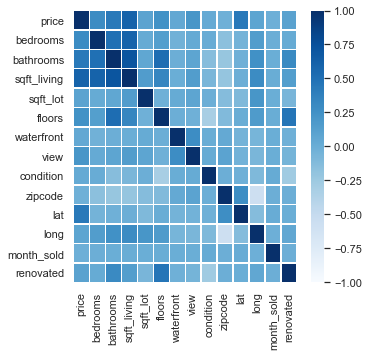

In [54]:
#Correlation matrix
corr = df.corr() 

#Mask 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Matplotlib figure
plt.subplots(figsize=(5, 5))

#Custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

#Heatmap with the mask & ratio
sns.heatmap(corr, cmap="Blues", vmax=1, vmin=-1, center=0, linewidths=.5)

In [55]:
#All correlations above .75
abs(corr) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,month_sold,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [56]:
## Homoscedasticity

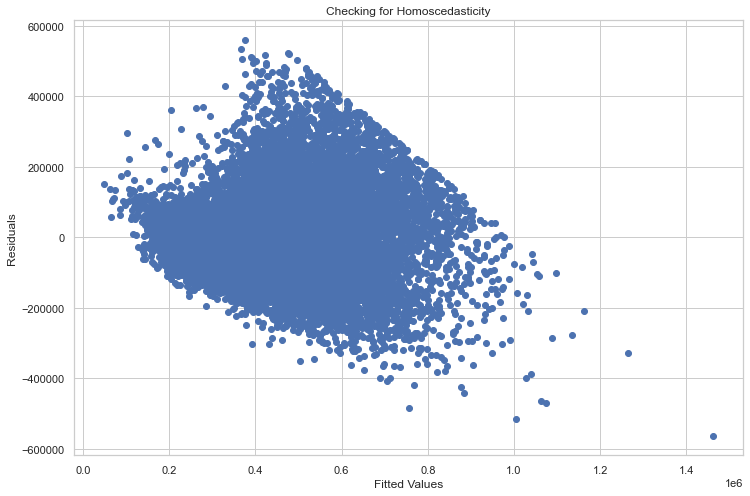

In [57]:
plt.figure(figsize=(12, 8))
plt.scatter(train_preds, smmodel.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Checking for Homoscedasticity')
plt.show()

In [58]:
# Normality

<AxesSubplot:ylabel='Count'>

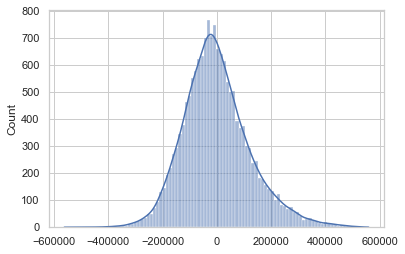

In [59]:
sns.histplot(smmodel.resid,kde=True)

<Figure size 864x576 with 0 Axes>

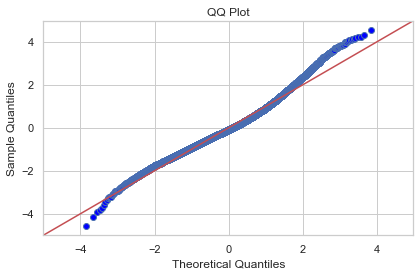

In [60]:
plt.figure(figsize=(12, 8))
sm.graphics.qqplot(smmodel.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

In [61]:
model_coefficients = pd.DataFrame(smmodel.params[1:], columns=['coefficients'])
model_coefficients

,coefficients
bedrooms,-16430.684071
bathrooms,7532.023873
sqft_living,154.943895
sqft_lot,0.204293
floors,20741.812496
waterfront,113051.195619
view,41715.402443
condition,31824.189561
zipcode,-251.275046
lat,637309.895084
